# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

## Load required libraries and datasets

#### Load required libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import datetime
from datetime import timedelta
import re
import string
from scipy.stats import ttest_ind
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

#### Load required datasets

In [79]:
transactionData = pd.read_csv('QVI_transaction_data.csv')
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

## Exploratory data analysis

### Examining transaction data

In this section we will begin by checking the format of each column of the transaction dataset

In [80]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


Let's take a look at the first 10 rows of the dataset

In [81]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


Notice that the date column is in an integer format, in this case we need to convert the column to a date format.

#### Convert DATE to date format

In [82]:
transactionData['DATE'] = pd.TimedeltaIndex(transactionData['DATE'],unit = 'd') + datetime.datetime(1899, 12, 30)

Let's check out the date column

In [83]:
transactionData['DATE'].head(10).to_frame()

,DATE
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18
5,2019-05-19
6,2019-05-16
7,2019-05-16
8,2018-08-20
9,2018-08-18


Now let's check if we are looking at the right products by examining the product name.

#### Examine PROD_NAME

In [84]:
transactionData['PROD_NAME'].head(10).to_frame()

,PROD_NAME
0,Natural Chip Compny SeaSalt175g
1,CCs Nacho Cheese 175g
2,Smiths Crinkle Cut Chips Chicken 170g
3,Smiths Chip Thinly S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g
5,Old El Paso Salsa Dip Tomato Mild 300g
6,Smiths Crinkle Chips Salt & Vinegar 330g
7,Grain Waves Sweet Chilli 210g
8,Doritos Corn Chip Mexican Jalapeno 150g
9,Grain Waves Sour Cream&Chives 210G


Let's generate a brief summary of the PROD_NAME column.

In [85]:
transactionData['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Further check if the entries are all chips.

#### Examine the words in PROD_NAME to see if there are any incorrect entries

Remove digits and special characters

In [86]:
#First we remove digits in the each element of PROD_NAME
productWord = transactionData['PROD_NAME'].str.replace('\d+','')

#Then remove the special characters
productWord = productWord.str.replace('[^\w\s]','')

#Present the first 10 rows
productWord.head(10).to_frame()

,PROD_NAME
0,Natural Chip Compny SeaSaltg
1,CCs Nacho Cheese g
2,Smiths Crinkle Cut Chips Chicken g
3,Smiths Chip Thinly SCreamOnion g
4,Kettle Tortilla ChpsHnyJlpno Chili g
5,Old El Paso Salsa Dip Tomato Mild g
6,Smiths Crinkle Chips Salt Vinegar g
7,Grain Waves Sweet Chilli g
8,Doritos Corn Chip Mexican Jalapeno g
9,Grain Waves Sour CreamChives G


Sorting the distinct words by frequency of occurrence in order of highest to lowest frequency.

In [87]:
#Count and sort the frequency of occurrence
productWord = productWord.value_counts()

#Present the sorted words in a table
productWord = productWord.to_frame().reset_index()
productWord.rename(columns = {'index':'PROD_NAME',
                              'PROD_NAME':'QTY'}, inplace=True)
productWord

,PROD_NAME,QTY
0,Kettle Mozzarella Basil Pesto g,3304
1,Kettle Tortilla ChpsHnyJlpno Chili g,3296
2,Cobs Popd SwtChlli SrCream Chips g,3269
3,Tyrrells Crisps Ched Chives g,3268
4,Cobs Popd Sea Salt Chips g,3265
...,...,...
109,RRD Pc Sea Salt g,1431
110,Woolworths Medium Salsa g,1430
111,NCC Sour Cream Garden Chives g,1419
112,French Fries Potato Chips g,1418


Observe that there are salsa products in the dataset so further cleaning is needed as we are only interested in the chips category.

#### Remove salsa products

In [88]:
#Remove data that contains "salsa" in its product name
transactionData = transactionData[~transactionData['PROD_NAME'].str.contains("salsa",case = False)]

transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Now let's check summary statistics for each feature to see if there are any obvious outliers in the data or if there are any missing values in any of the columns.

#### Summarise the date to check for nulls and possible outliers

In [89]:
#Create a summary for all feature column in the data
summary = transactionData.describe()

#Drop unnecessary column such as ID and card number etc
summary.drop(['STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR'],axis = 1)


,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000
mean,1.908062,7.321322
std,0.659831,3.077828
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,200.000000,650.000000


In [90]:
#Check if there is any missing value in any column
transactionData.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

Based on our summary above, there seem to be no missing values but product quantity appears to have an outlier which we should further investigate. Let's investigate further the case where 200 packets of chips are bought in one transaction.

#### Filter the dataset to find the outlier

In [91]:
transactionData[transactionData['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.
Let's see if the customer has had any other transactions.

In [92]:
transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It seems like this customer has only the two transactions over the year and is not an ordinary retail customer. We should remove this loyalty card number from further analysis.

#### Filter out the customer based on the loyalty card number

In [93]:
#Deletes the outlier data
transactionData = transactionData[~(transactionData['LYLTY_CARD_NBR'] == 226000)]

transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Now let's reexamine the transaction data to see if outliers still exist in the data.

#### Reexamine transaction data

In [94]:
#Create a summary of the transaction data
transactionData.describe().drop(['STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR'],axis = 1)

,PROD_QTY,TOT_SALES
count,246740.000000,246740.000000
mean,1.906456,7.316113
std,0.342499,2.474897
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,5.000000,29.500000


#### Count the number of transaction by date

In [95]:
#Create a summary of transaction count by date
transactionDate = transactionData['DATE'].value_counts()
transactionDate = transactionDate.reset_index().rename(columns = {'index':'DATE','DATE':'TOTAL'})

transactionDate

,DATE,TOTAL
0,2018-12-24,865
1,2018-12-23,853
2,2018-12-22,840
3,2018-12-19,839
4,2018-12-20,808
...,...,...
359,2019-06-24,612
360,2018-10-18,611
361,2018-11-25,610
362,2018-09-22,609


Notice there is only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

#### Create a sequence of dates and join this to the count of transactions by date

In [96]:
#Create a sequence of dates
yearDate = pd.date_range(start = "2018-07-01",end = "2019-06-30")

In [97]:
#Convert yearDate to dataframe format
yearDate = pd.DataFrame(yearDate, columns = ['DATE'])

#Join yearDate with transactionDate
dateData = pd.concat([transactionDate, yearDate],sort = False).drop_duplicates(subset = 'DATE')
dateData.fillna(0,inplace = True)

dateData

,DATE,TOTAL
0,2018-12-24,865.0
1,2018-12-23,853.0
2,2018-12-22,840.0
3,2018-12-19,839.0
4,2018-12-20,808.0
...,...,...
360,2018-10-18,611.0
361,2018-11-25,610.0
362,2018-09-22,609.0
363,2019-06-13,607.0


Now that we figured out the missing date, we can plot a graph of transactions over time to examine the trend of transactions.

#### Plot transactions over time

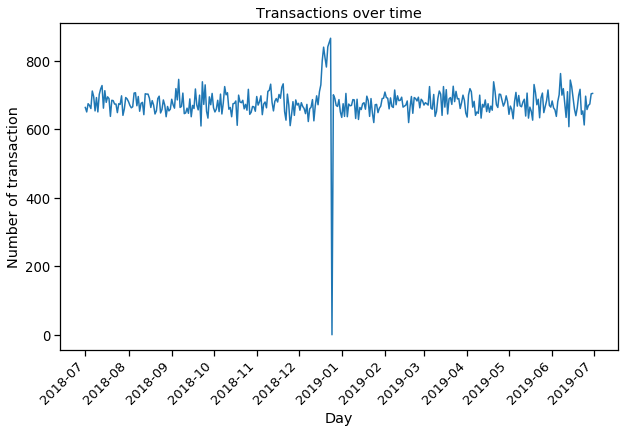

In [177]:
#Setting plot themes to format graphs
plt.figure(figsize = (10,6))
sns.set_context('notebook',font_scale = 1.2)  

#Plot transactions over time graph
transactionTime = sns.lineplot(x = 'DATE',y = 'TOTAL',data = dateData)

transactionTime.set(xlabel = 'Day',
                    ylabel = 'Number of transaction',
                    title = 'Transactions over time')

#Adjust x-axis label
loc = dates.MonthLocator()
transactionTime.xaxis.set_major_locator(loc)

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 13.0)

transactionTime

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

#### Filter to December and look at individual days

In [99]:
#Filter to december data
decData = dateData[(dateData['DATE'] > datetime.date(2018,11,30)) & (dateData['DATE'] < datetime.date(2019,1,1))]

decData['DATE'].sort_values().to_frame()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,DATE
174,2018-12-01
286,2018-12-02
166,2018-12-03
232,2018-12-04
265,2018-12-05
318,2018-12-06
192,2018-12-07
356,2018-12-08
269,2018-12-09
245,2018-12-10


#### Plot december data

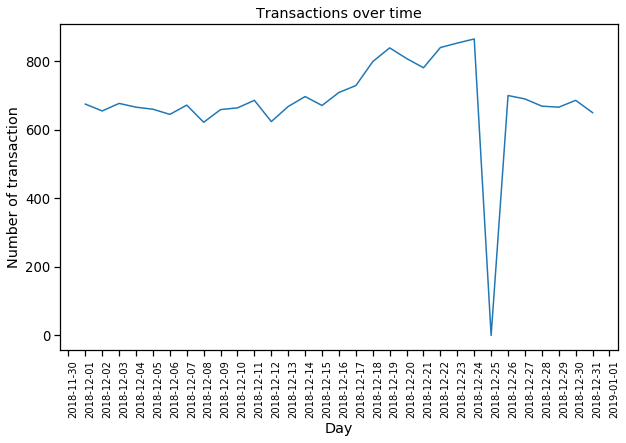

In [178]:
#Plot december data
plt.figure(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2)  
decTransaction = sns.lineplot(x = 'DATE',y = 'TOTAL',data = decData)
decTransaction.set(xlabel = 'Day',
                   ylabel = 'Number of transaction',
                   title = 'Transactions over time')

loc = dates.DayLocator()
decTransaction.xaxis.set_major_locator(loc)

plt.xticks(rotation = 90, 
           horizontalalignment = 'left',
           fontweight = 'light',
           fontsize = 10.0)

decTransaction

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.

#### Create pack size column

In [101]:
#Find pack size by taking the digits in PROD_NAME
packSize = transactionData['PROD_NAME'].str.extract('(\d+)')
packSize.rename(columns = {0:'PACK_SIZE'},inplace = True)

packSize

,PACK_SIZE
0,175
1,175
2,170
3,175
4,150
...,...
264831,175
264832,175
264833,170
264834,150


Let's check if the pack sizes look sensible

In [102]:
#Convert PACK_SIZE column to integer
packSize['PACK_SIZE'] = pd.to_numeric(packSize['PACK_SIZE'], errors = 'ignore')

#Check all unique pack sizes
packSize['PACK_SIZE'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70])

In [103]:
#Create a basic summary of pack sizes
packSize.describe()

,PACK_SIZE
count,246740.000000
mean,175.583521
std,59.432118
min,70.000000
25%,150.000000
50%,170.000000
75%,175.000000
max,380.000000


The largest size is 380g and the smallest size is 70g - seems sensible! Now let's plot a histogram showing number of transactions by pack size.

#### Plot number of transactions over pack size

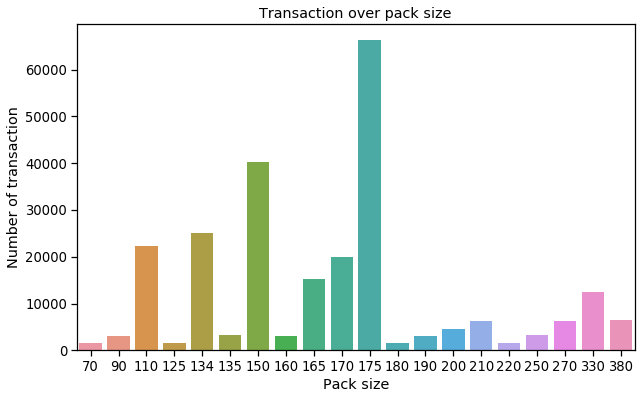

In [152]:
#Plot number of transactions over pack size
plt.figure(figsize = (10,6)) 

packPlot = sns.countplot(x = 'PACK_SIZE',data = packSize)
packPlot.set(xlabel = 'Pack size',
             ylabel = 'Number of transaction',
             title = 'Transaction over pack size')

packPlot

Pack sizes created look reasonable. We can join this PACK_SIZE column to the transaction dataset.

#### Join pack size column to the transaction data

In [105]:
#Add PACK_SIZE column into the transaction dataset
transactionData = transactionData.join(packSize)

transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


Now let's continue with brands of chip.

#### Create brand name column

In [106]:
#Create a column for brand name by extracting the first word in the product name
brandData = transactionData['PROD_NAME'].str.extract(pat = '([a-zA-Z]+)', expand = False)

#Present the BRAND column
brandData = brandData.to_frame()
brandData.rename(columns = {'PROD_NAME':'BRAND'},inplace = True)

brandData

,BRAND
0,Natural
1,CCs
2,Smiths
3,Smiths
4,Kettle
...,...
264831,Kettle
264832,Tostitos
264833,Doritos
264834,Doritos


Let's check all the brands listed in the dataset.

In [107]:
brandData['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Seems like some of the brand names listed are of the same brand - such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together.

#### Clean brand names

In [108]:
#Group similar brand names
brandData.replace(['Smiths','Smith'],'Smiths',inplace = True)
brandData.replace(['RRD','Red'],'Red Rocks Deli',inplace = True)
brandData.replace(['Doritos','Dorito'],'Doritos',inplace = True)
brandData.replace(['Infuzions','Infzns'],'Infuzions',inplace = True)
brandData.replace(['GrnWves','Grain'],'Grain Waves',inplace = True)
brandData.replace(['NCC','Natural'],'Natural Chip Co.',inplace = True)
brandData.replace(['Snbts','Sunbites'],'Sunbites',inplace = True)
brandData.replace(['WW','Woolworths'],'Woolworths',inplace = True)

#Check if brand names are cleaned
brandData['BRAND'].unique()

array(['Natural Chip Co.', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rocks Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

Seems more reasonable now. Let's group them together to generate a summary of the brand data and plot the data.

In [109]:
#Create a brand summary
brandSummary = brandData['BRAND'].value_counts().to_frame().reset_index()
brandSummary.rename(columns = {'index':'BRAND','BRAND':'TOTAL'},inplace = True)

brandSummary

,BRAND,TOTAL
0,Kettle,41288
1,Smiths,30353
2,Doritos,25224
3,Pringles,25102
4,Red Rocks Deli,16321
5,Infuzions,14201
6,Thins,14075
7,Woolworths,11836
8,Cobs,9693
9,Tostitos,9471


#### Plot number of transaction over brand

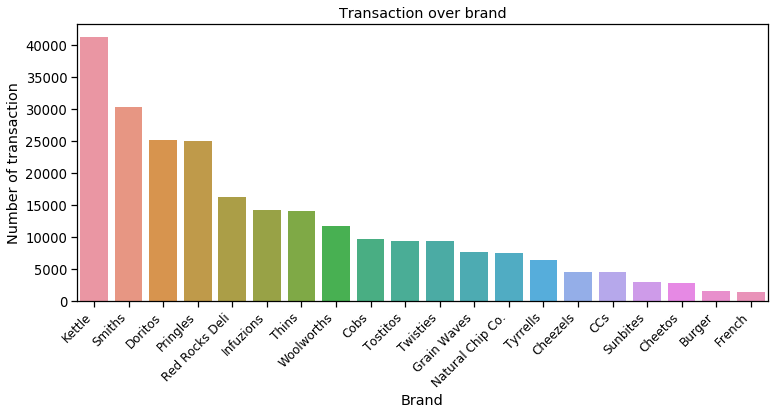

In [155]:
#Plot number of transaction over brand
plt.figure(figsize = (11,6)) 

brandPlot = sns.barplot(x = 'BRAND',y = 'TOTAL',data = brandSummary)

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 12.0)

brandPlot.set(xlabel = 'Brand',
              ylabel = 'Number of transaction',
              title = 'Transaction over brand')

brandPlot

Now that the brand data looks reasonable, we can join it to the transaction dataset.

#### Join brand column to the transaction data

In [111]:
#Add BRAND column into the transaction dataset
transactionData = transactionData.join(brandData)
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co.
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


Now that we are happy with the transaction dataset, let's have a look at the customer dataset.

### Examine customer data

Let's read the customer data and do some basic summaries of the dateset including distributions of any key columns.

In [112]:
#Read customer data
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

#Present first 10 row of the dataset
customerData.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


#### Check and summarise key columns

In [113]:
#Check for missing values
customerData.isnull().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [114]:
#Create a summary of key columns
customerSumm = customerData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count()
customerSumm.rename(columns = {'LYLTY_CARD_NBR':'TOTAL'}, inplace = True)

customerSumm

TOTAL
LIFESTAGE              PREMIUM_CUSTOMER       
MIDAGE SINGLES/COUPLES Budget             1504
                       Mainstream         3340
                       Premium            2431
NEW FAMILIES           Budget             1112
                       Mainstream          849
                       Premium             588
OLDER FAMILIES         Budget             4675
                       Mainstream         2831
                       Premium            2274
OLDER SINGLES/COUPLES  Budget             4929
                       Mainstream         4930
                       Premium            4750
RETIREES               Budget             4454
                       Mainstream         6479
                       Premium            3872
YOUNG FAMILIES         Budget             4017
                       Mainstream         2728
                       Premium            2433
YOUNG SINGLES/COUPLES  Budget             3779
                       Mainstream         8088
                       Premium            2574

Great, there are no nulls in the datasets. Now let's plot number of customers over premium customer.

#### Plot number of customer over premium customer

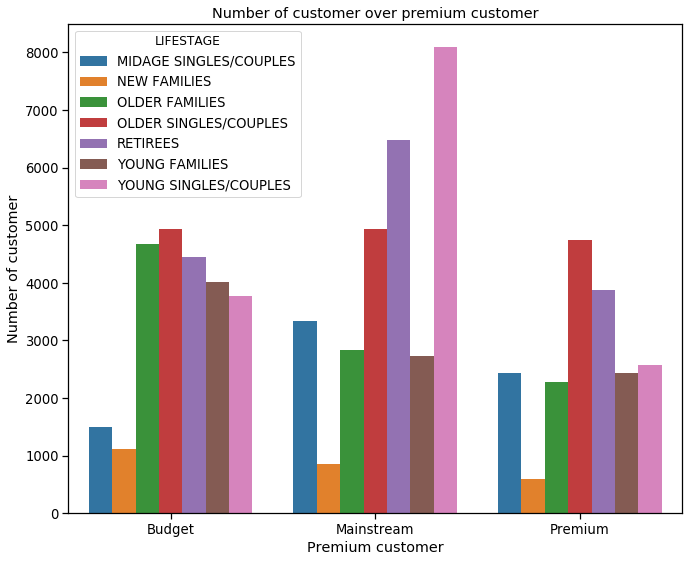

In [156]:
#Plot number of customer over premium customer
plt.figure(figsize = (11,9))

total = customerSumm['TOTAL'].sum()
sns.set_context('notebook',font_scale = 1.2)  

customerPlot = sns.barplot(x = 'PREMIUM_CUSTOMER',
                           y = 'TOTAL',
                           data = customerSumm.reset_index(),
                           hue = 'LIFESTAGE')

customerPlot.set(xlabel = 'Premium customer',
                 ylabel = 'Number of customer',
                 title = 'Number of customer over premium customer')

customerPlot

Here we notice that Mainstream young singles or couples constitutes the largest customer base followed by Mainstream retirees. 

Now let's merge transaction data to the customer data.

#### Merge transaction data to customer data

In [116]:
#Merge the two datasets
data = pd.merge(transactionData,customerData,how = 'left',on = 'LYLTY_CARD_NBR')

data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co.,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


As the number of rows in `data` is the same as that of `transactionData`, we can be sure that no duplicates were created.
Let's also check if some customers were not matched on by checking for missing values.


In [117]:
#Check for missing values in any column
data.isnull().any()

DATE                False
STORE_NBR           False
LYLTY_CARD_NBR      False
TXN_ID              False
PROD_NBR            False
PROD_NAME           False
PROD_QTY            False
TOT_SALES           False
PACK_SIZE           False
BRAND               False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

Let's retain this dataset as a csv for later use.

In [118]:
#Write the data into a csv file
data.to_csv('QVI_data.csv', mode = 'w')

Data exploration is now complete!

## Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

Let's start with calculating total sales by `LIFESTAGE` and `PREMIUM_CUSTOMER` and plotting the split by these segments to describe which customer segment contribute most to chip sales.

#### Summarise and plot total sales by lifestage and premium customer

In [165]:
#Summarise total sales by LIFESTAGE and PREMIUM_CUSTOMER
salesData = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).sum()['TOT_SALES']

salesData.to_frame()

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

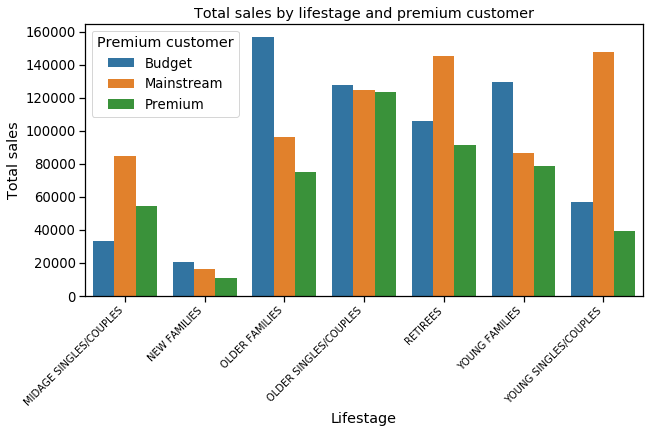

In [167]:
#Plot total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize = (10,5))

salesData = salesData.reset_index()
salesPlot = sns.barplot(x = 'LIFESTAGE',
                        y = 'TOT_SALES',
                        data = salesData,
                        ci = None,
                        hue = 'PREMIUM_CUSTOMER')

salesPlot.set(xlabel = 'Lifestage',
              ylabel = 'Total sales',
              title = 'Total sales by lifestage and premium customer')

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

plt.legend(loc = "upper left",
           ncol = 1, 
           shadow = False, 
           title = "Premium customer")

salesPlot

Observe that sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees. 
<br><br>
Let's see if the higher sales are due to there being more customers who buy chips.

#### Summarise and plot number of customers by lifestage and premium customer

In [121]:
#Summarise number of customer by LIFESTAGE and PREMIUM_CUSTOMER
groupData = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR']
groupData = pd.DataFrame(groupData.nunique()).rename(columns = {'LYLTY_CARD_NBR':'TOTAL'})

groupData

TOTAL
LIFESTAGE              PREMIUM_CUSTOMER       
MIDAGE SINGLES/COUPLES Budget             1474
                       Mainstream         3298
                       Premium            2369
NEW FAMILIES           Budget             1087
                       Mainstream          830
                       Premium             575
OLDER FAMILIES         Budget             4611
                       Mainstream         2788
                       Premium            2231
OLDER SINGLES/COUPLES  Budget             4849
                       Mainstream         4858
                       Premium            4682
RETIREES               Budget             4385
                       Mainstream         6358
                       Premium            3812
YOUNG FAMILIES         Budget             3953
                       Mainstream         2685
                       Premium            2398
YOUNG SINGLES/COUPLES  Budget             3647
                       Mainstream         7917
                       Premium            2480

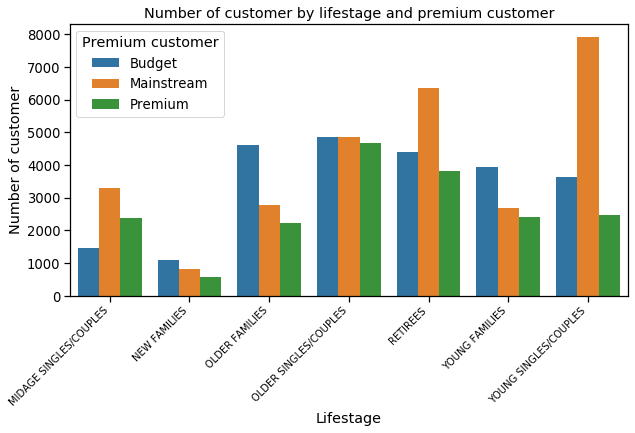

In [169]:
#Plot number of customer by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize = (10,5))

groupData = groupData.reset_index()
groupPlot = sns.barplot(x = 'LIFESTAGE',y = 'TOTAL',data = groupData, ci = None,hue = 'PREMIUM_CUSTOMER')

groupPlot.set(xlabel = 'Lifestage',
              ylabel = 'Number of customer',
              title = 'Number of customer by lifestage and premium customer')

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

plt.legend(loc = "upper left",
           ncol = 1, 
           shadow = False, 
           title = "Premium customer")

groupPlot

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.
<br><br>
Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.


#### Summarise and plot average number of unit per customer by lifestage and premium customer

In [173]:
#Summarise average number of unit per customer by LIFESTAGE and PREMIUM_CUSTOMER
avgUnitData = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY']
avgUnitData = pd.DataFrame(avgUnitData.mean()).rename(columns = {'PROD_QTY':'AVG_PER_CUSTOMER'})

avgUnitData

AVG_PER_CUSTOMER
LIFESTAGE              PREMIUM_CUSTOMER                  
MIDAGE SINGLES/COUPLES Budget                    1.893626
                       Mainstream                1.911942
                       Premium                   1.891750
NEW FAMILIES           Budget                    1.855878
                       Mainstream                1.858124
                       Premium                   1.860887
OLDER FAMILIES         Budget                    1.945384
                       Mainstream                1.948795
                       Premium                   1.945496
OLDER SINGLES/COUPLES  Budget                    1.914920
                       Mainstream                1.911201
                       Premium                   1.913949
RETIREES               Budget                    1.893286
                       Mainstream                1.886680
                       Premium                   1.901438
YOUNG FAMILIES         Budget                    1.941226
                       Mainstream                1.941408
                       Premium                   1.938149
YOUNG SINGLES/COUPLES  Budget                    1.808002
                       Mainstream                1.853510
                       Premium                   1.807075

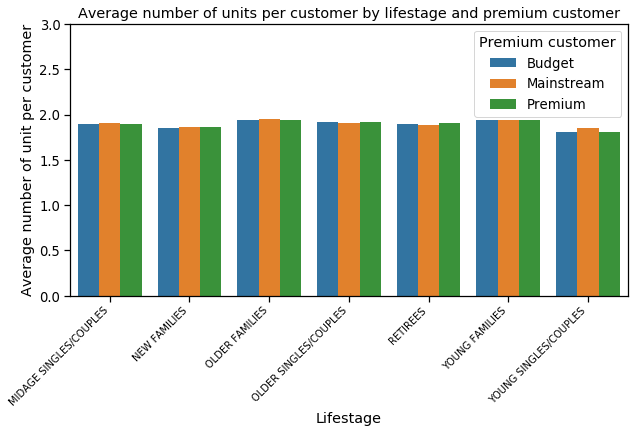

In [175]:
#Plot average number of unit per customer by LIFESTAGE and PREMIUM_CUSTOMER
avgUnitData = avgUnitData.reset_index()

plt.figure(figsize = (10,5))

avgUnitPlot = sns.barplot(x = 'LIFESTAGE',y = 'AVG_PER_CUSTOMER',data = avgUnitData, ci = None,hue = 'PREMIUM_CUSTOMER')

avgUnitPlot.set(xlabel = 'Lifestage',
                ylabel = 'Average number of unit per customer',
                title = 'Average number of units per customer by lifestage and premium customer')

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

plt.legend(loc = "upper right",
           ncol = 1, 
           shadow = False, 
           title = "Premium customer")

axes = plt.gca()
axes.set_ylim([0,3.0])

avgUnitPlot

Older families and young families in general buy more chips per customer.
<br><br>
Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

#### Summarise and plot average price per unit by lifestage and premium customer

In [125]:
#Calculate average price per unit
def avg_unit_price(unit, tot_sales):
    return tot_sales/unit

In [126]:
#Create an average unit price column for each transaction
data['AVG_UNIT_PRICE'] = data.apply(lambda x: avg_unit_price(x.PROD_QTY, x.TOT_SALES), axis = 1)

#Check the first 10 rows
data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,AVG_UNIT_PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co.,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget,5.70
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.60
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget,3.90
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.60
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget,5.70


In [127]:
#Summarise average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avgUnitPriceData = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['AVG_UNIT_PRICE'].mean()
avgUnitPriceData = pd.DataFrame(avgUnitPriceData)

avgUnitPriceData

AVG_UNIT_PRICE
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                  3.743328
                       Mainstream              3.994241
                       Premium                 3.770698
NEW FAMILIES           Budget                  3.917688
                       Mainstream              3.916133
                       Premium                 3.872110
OLDER FAMILIES         Budget                  3.745340
                       Mainstream              3.737077
                       Premium                 3.717000
OLDER SINGLES/COUPLES  Budget                  3.882096
                       Mainstream              3.814665
                       Premium                 3.893182
RETIREES               Budget                  3.924404
                       Mainstream              3.844294
                       Premium                 3.920942
YOUNG FAMILIES         Budget                  3.760737
                       Mainstream              3.724533
                       Premium                 3.762150
YOUNG SINGLES/COUPLES  Budget                  3.657366
                       Mainstream              4.065642
                       Premium                 3.665414

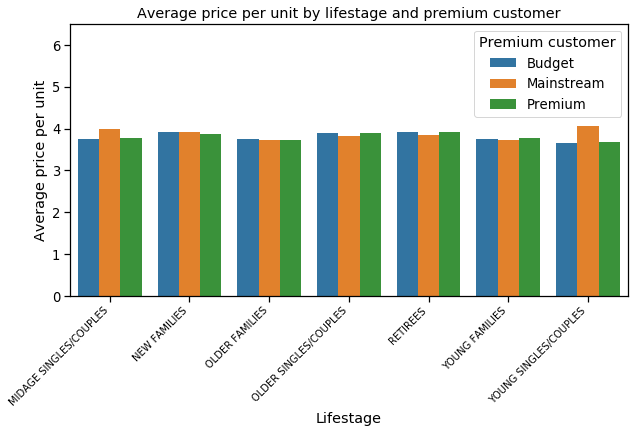

In [176]:
#Plot average number of unit per customer by LIFESTAGE and PREMIUM_CUSTOMER
avgUnitPriceData = avgUnitPriceData.reset_index()

plt.figure(figsize = (10,5))

avgUnitPricePlot = sns.barplot(x = 'LIFESTAGE',y = 'AVG_UNIT_PRICE',data = avgUnitPriceData, ci = None,hue = 'PREMIUM_CUSTOMER')

avgUnitPricePlot.set(xlabel = 'Lifestage',
                     ylabel = 'Average price per unit',
                     title = 'Average price per unit by lifestage and premium customer')

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

plt.legend(loc = "upper right",
           ncol = 1, 
           shadow = False, 
           title = "Premium customer")

axes = plt.gca()
axes.set_ylim([0,6.5])

avgUnitPricePlot

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.
<br><br>
As the difference in average price per unit isn't large, we can check if this difference is statistically different.

#### Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples


$H_{0} : \mu_{mainstream} = \mu_{premium\,and\,budget}$ 
<br>
$H_{1} : \mu_{mainstream} > \mu_{premium\,and\,budget}$ 

In [129]:
#Obtain the sample of premium and budget midage and young singles and couples
mainstreamSample = data[(data['LIFESTAGE'].str.contains("YOUNG SINGLES/COUPLES|MIDAGE SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]['AVG_UNIT_PRICE']

In [130]:
#Obtain the sample of mainstream midage and young singles and couples
premBudgetSample = data[(data['LIFESTAGE'].str.contains("YOUNG SINGLES/COUPLES|MIDAGE SINGLES/COUPLES")) & (data['PREMIUM_CUSTOMER'] != 'Mainstream')]['AVG_UNIT_PRICE']

In [131]:
#Perform independent t-test on the two samples
result = ttest_ind(mainstreamSample, premBudgetSample, equal_var = False)

result

Ttest_indResult(statistic=37.6243885962295, pvalue=6.967354233018139e-306)

The t-test results in a p-value of approximately zero which indicates strong evidence to reject $H_{0}$. Therefore, the unit prices for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

## Dive deep into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into.
<br><br>
We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

In this case, we could use affinity analysis to find brands that these two customer segments prefer over others.

#### Find preferred brands of the customer segment compared to the rest of the population using affinity analysis

In [132]:
#Deep dive into Mainstream, young singles/couples
segment1 = data[(data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream")]
other = data[~((data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream"))]

#Find the total products purchased in each segment
quantitySegment1 = segment1['PROD_QTY'].sum()
quantityOther = other['PROD_QTY'].sum()


In [133]:
#Create a column to find the proportion of products purchased over the 
#total products purchased in the segment
targetSegment = segment1['PROD_QTY']/float(quantitySegment1)
segment1 = segment1.assign(targetSegment = pd.Series(targetSegment))

#Sort and sum the targetSegment based on brands
quantitySegment1ByBrand = segment1.groupby('BRAND').sum()['targetSegment']

quantitySegment1ByBrand.to_frame()

,targetSegment
BRAND,
Burger,0.002926
CCs,0.011180
Cheetos,0.008033
Cheezels,0.017971
Cobs,0.044638
Doritos,0.122761
French,0.003948
Grain Waves,0.032712
Infuzions,0.064679


In [134]:
#Create a column to find the proportion of products purchased over the 
#total products purchased in the segment
otherSegment = other['PROD_QTY']/quantityOther
other = other.assign(otherSegment = pd.Series(otherSegment))

#Sort and sum the targetSegment based on brands
quantityOtherByBrand = other.groupby('BRAND').sum()['otherSegment']
quantityOtherByBrand.to_frame()

,otherSegment
BRAND,
Burger,0.006596
CCs,0.018896
Cheetos,0.012067
Cheezels,0.018647
Cobs,0.039049
Doritos,0.101075
French,0.005758
Grain Waves,0.031188
Infuzions,0.057065


In [135]:
#Merge the two segments and calculate affinity to brand
brandProportions = pd.merge(quantitySegment1ByBrand, quantityOtherByBrand, how = 'left',on = 'BRAND')
brandProportions['affinityToBrand'] = brandProportions.apply(lambda x: x.targetSegment/x.otherSegment, axis = 1)

#Sort in descending order
brandProportions.sort_values(by='affinityToBrand',ascending = False)

,targetSegment,otherSegment,affinityToBrand
BRAND,,,
Tyrrells,0.031553,0.025692,1.228095
Twisties,0.046184,0.037877,1.219319
Doritos,0.122761,0.101075,1.214553
Kettle,0.197985,0.165553,1.195897
Tostitos,0.045411,0.037978,1.195713
Pringles,0.119420,0.100635,1.186670
Cobs,0.044638,0.039049,1.143124
Infuzions,0.064679,0.057065,1.133435
Thins,0.060373,0.056986,1.059423


We can see that:
- Mainstream young singles/couples are 22.8% more likely to purchase Tyrrells chips compared to the rest of the population
- Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

Let's also find out if our target segment tends to buy larger packs of chips.

#### Find preferred pack sizes of the customer segment compared to the rest of the population

In [136]:
#Sort and sum the targetSegment and otherSegment based on pack sizes
quantitySegment1BySize = segment1.groupby('PACK_SIZE').sum()['targetSegment']
quantityOtherBySize = other.groupby('PACK_SIZE').sum()['otherSegment']





In [137]:
#Merge the two segments and calculate affinity to brand
packProportions = pd.merge(quantitySegment1BySize, quantityOtherBySize, how = 'left',on = 'PACK_SIZE')
packProportions['affinityToPack'] = packProportions.apply(lambda x: x.targetSegment/x.otherSegment, axis = 1)

#Sort in descending order
packProportions.sort_values(by = 'affinityToPack',ascending = False)

,targetSegment,otherSegment,affinityToPack
PACK_SIZE,,,
270,0.031829,0.025096,1.268287
380,0.032160,0.025584,1.257030
330,0.061284,0.050162,1.221717
134,0.119420,0.100635,1.186670
110,0.106280,0.089791,1.183637
210,0.029124,0.025121,1.159318
135,0.014769,0.013075,1.129511
250,0.014355,0.012781,1.123166
170,0.080773,0.080986,0.997370


It looks like Mainstream young singles/couples are 26.8% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [138]:
data[data['PROD_NAME'].str.contains('270')]['PROD_NAME'].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

## Conclusion
<br>
Let's recap what we have found. 
<br><br>
Sales are mainly coming from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees. For Mainstream young singles/couples and retirees, the high spend in chip is due to there being more of them than other buyers in the chip category. Mainstream, midage and young singles and couples are more willing to pay more per packet of chips which is an indication of impulse buying behaviour.
<br><br>
Besides, we have also found that Mainstream young singles and couples are 22.8% more likely to purchase Tyrrells chips and about 25% more likely to purchase chips with pack size greater than or equal to 270g pack of chips as compared to the rest of the population.
<br><br>
In this case, the Category Manager may want to increase the category's performance by relocating some Tyrrells and larger packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibility and impulse purchase behaviour.